In [2]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Target looks like regression


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=8.04E-01'}, xlabel='reading score', ylabel='math score'>,
         <AxesSubplot: title={'center': 'F=7.78E-01'}, xlabel='writing score'>]],
       dtype=object),
 array([[<AxesSubplot: title={'center': 'F=8.47E-02'}, xlabel='math score', ylabel='gender'>,
         <AxesSubplot: title={'center': 'F=1.74E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <AxesSubplot: title={'center': 'F=7.65E-03'}, xlabel='math score', ylabel='parental level of education'>,
         <AxesSubplot: title={'center': 'F=6.26E-03'}, xlabel='math score', ylabel='lunch'>,
         <AxesSubplot: title={'center': 'F=0.00E+00'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

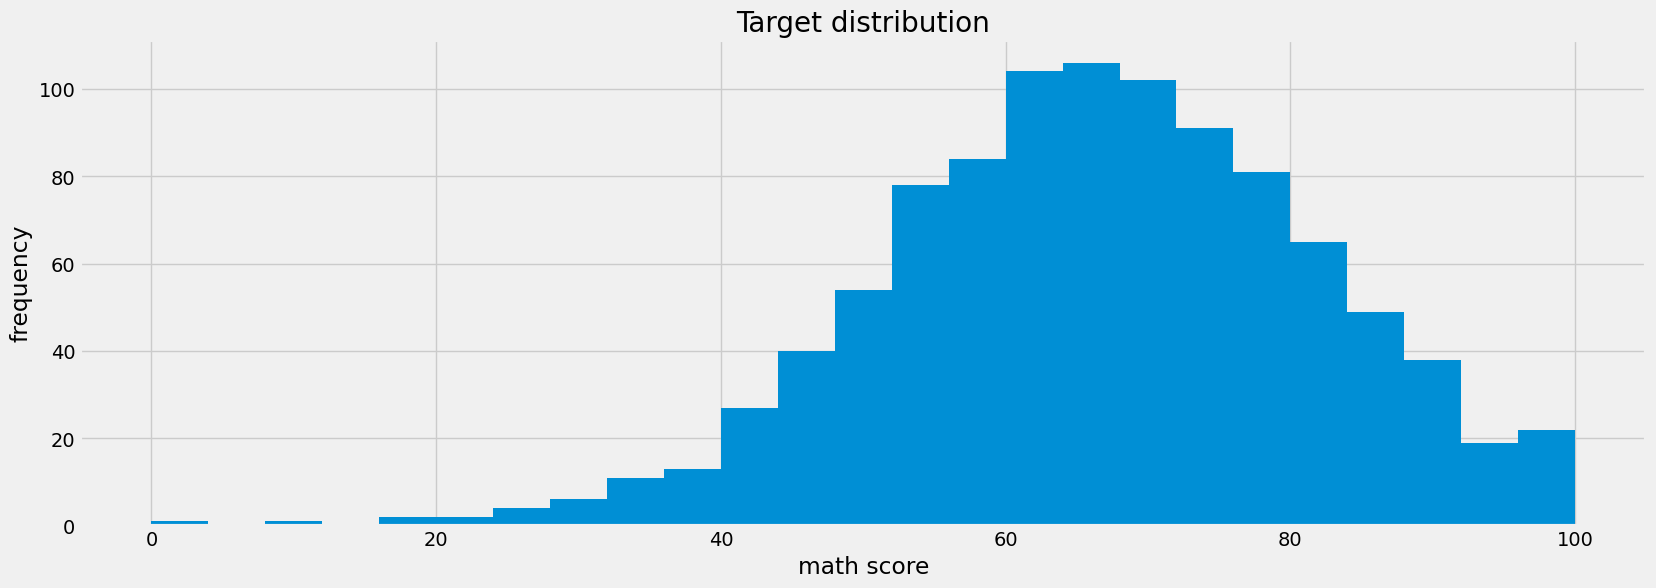

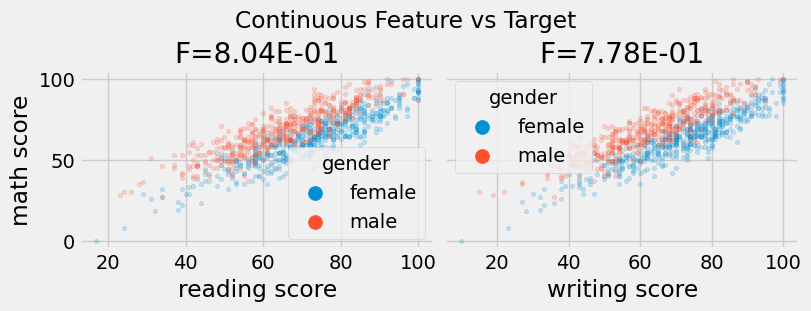

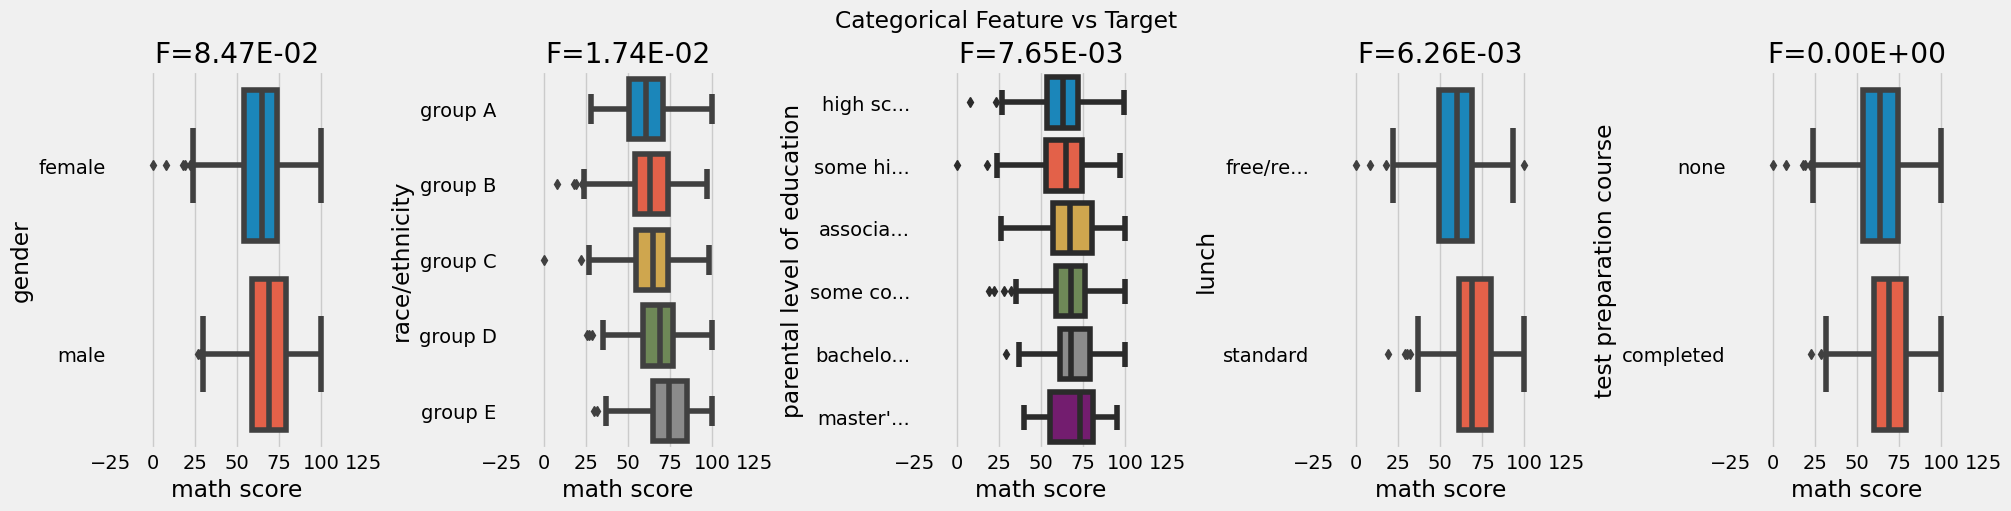

In [5]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'math score')

Target looks like regression


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='reading score', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=9.49E-01'}, xlabel='writing score', ylabel='reading score'>,
         <AxesSubplot: title={'center': 'F=8.04E-01'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot: title={'center': 'F=5.26E-02'}, xlabel='reading score', ylabel='gender'>,
         <AxesSubplot: title={'center': 'F=5.12E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <AxesSubplot: title={'center': 'F=3.02E-02'}, xlabel='reading score', ylabel='parental level of education'>,
         <AxesSubplot: title={'center': 'F=2.07E-02'}, xlabel='reading score', ylabel='lunch'>,
         <AxesSubplot: title={'center': 'F=1.05E-02'}, xlabel='reading score', ylabel='test preparation course'>]],
       dtype=object)]

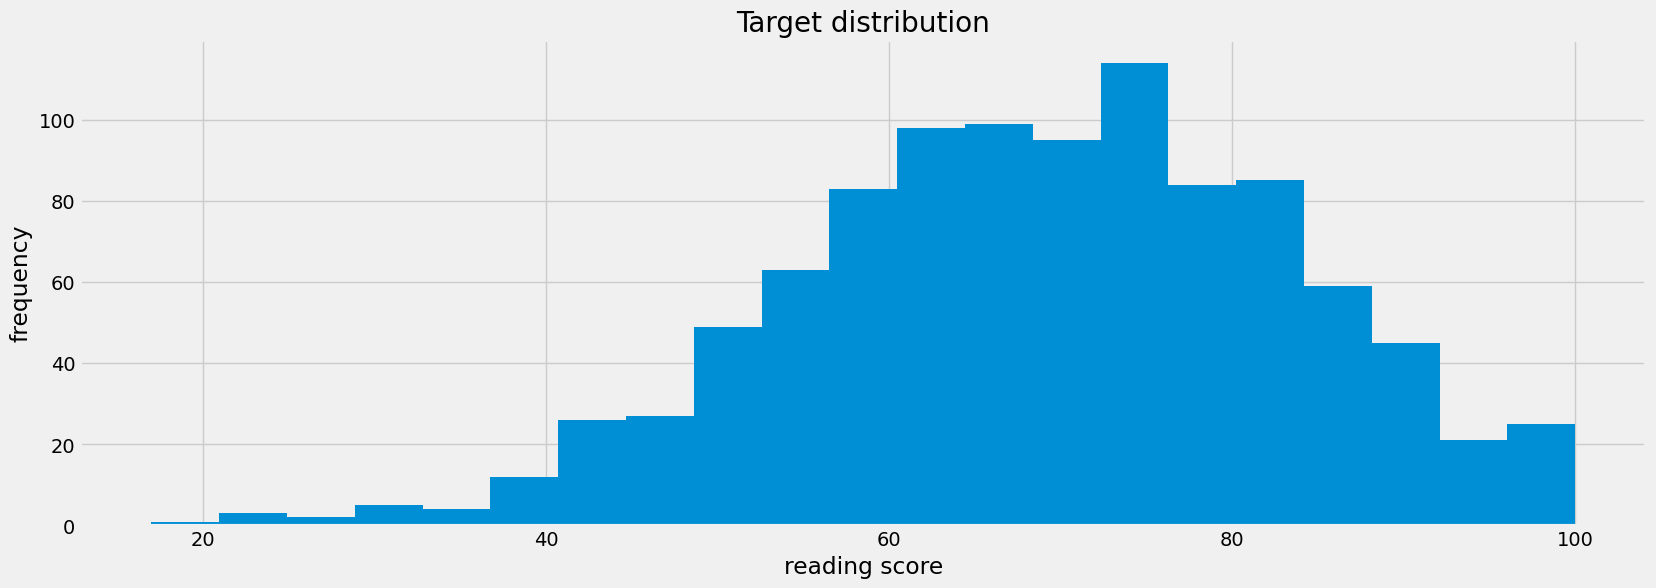

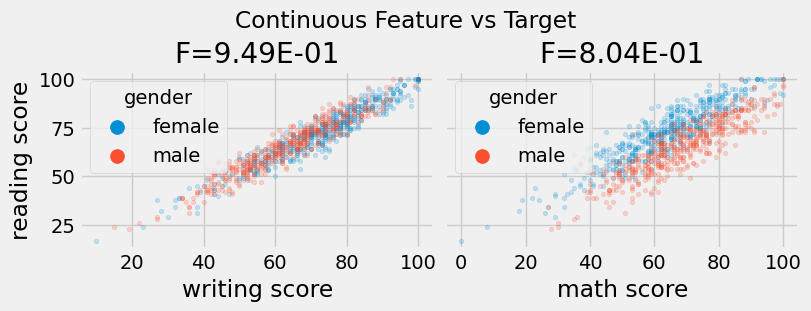

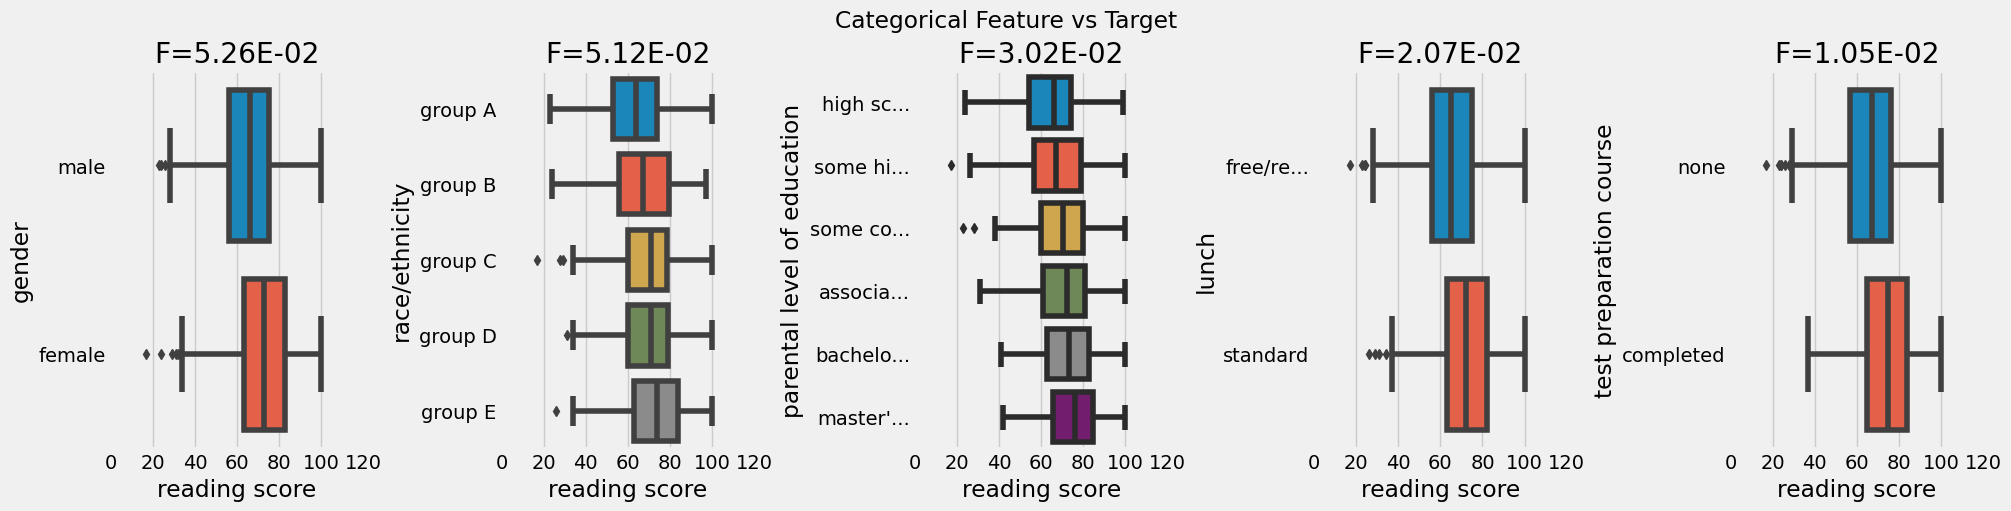

In [6]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'reading score')

In [10]:
df[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

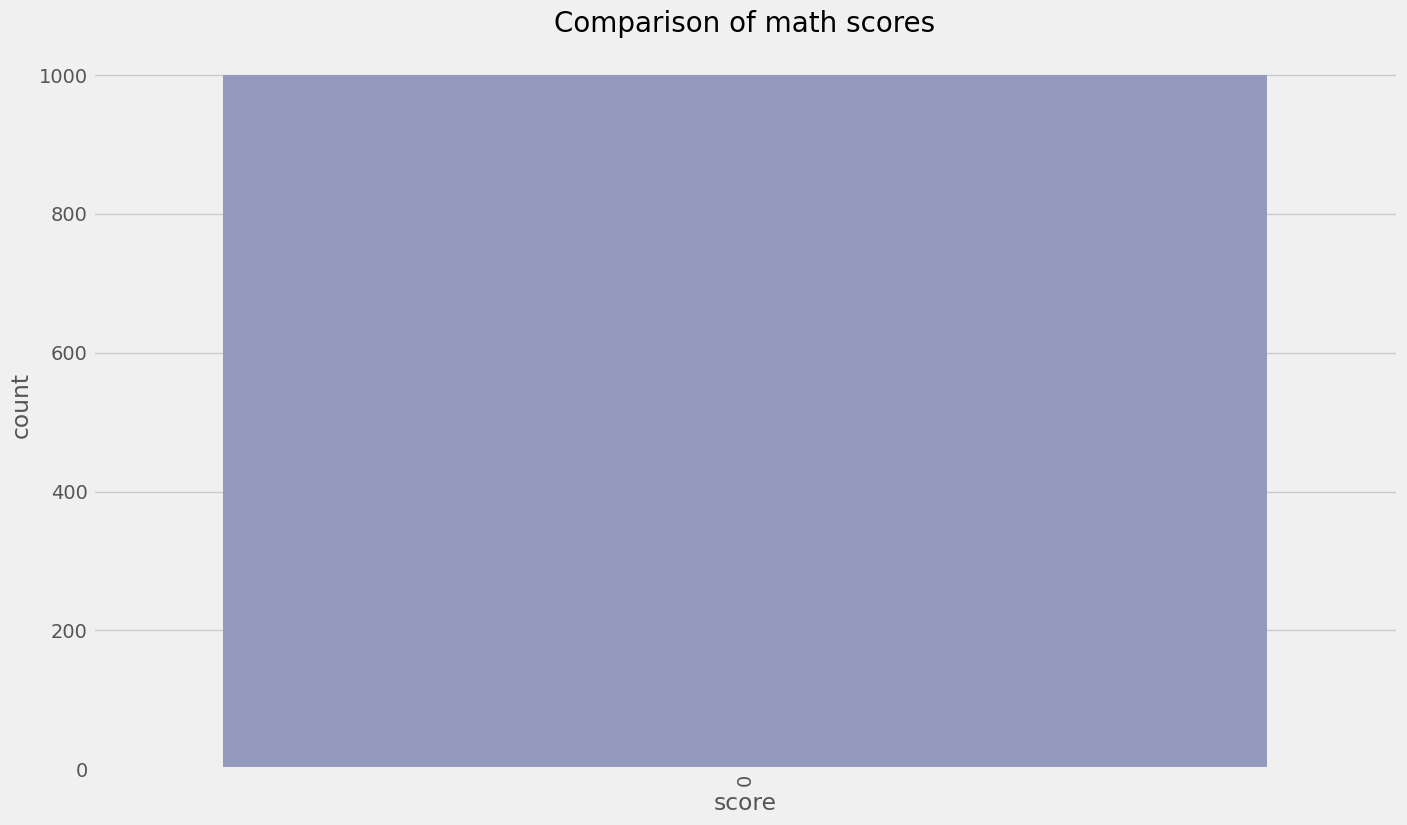

In [13]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(df['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

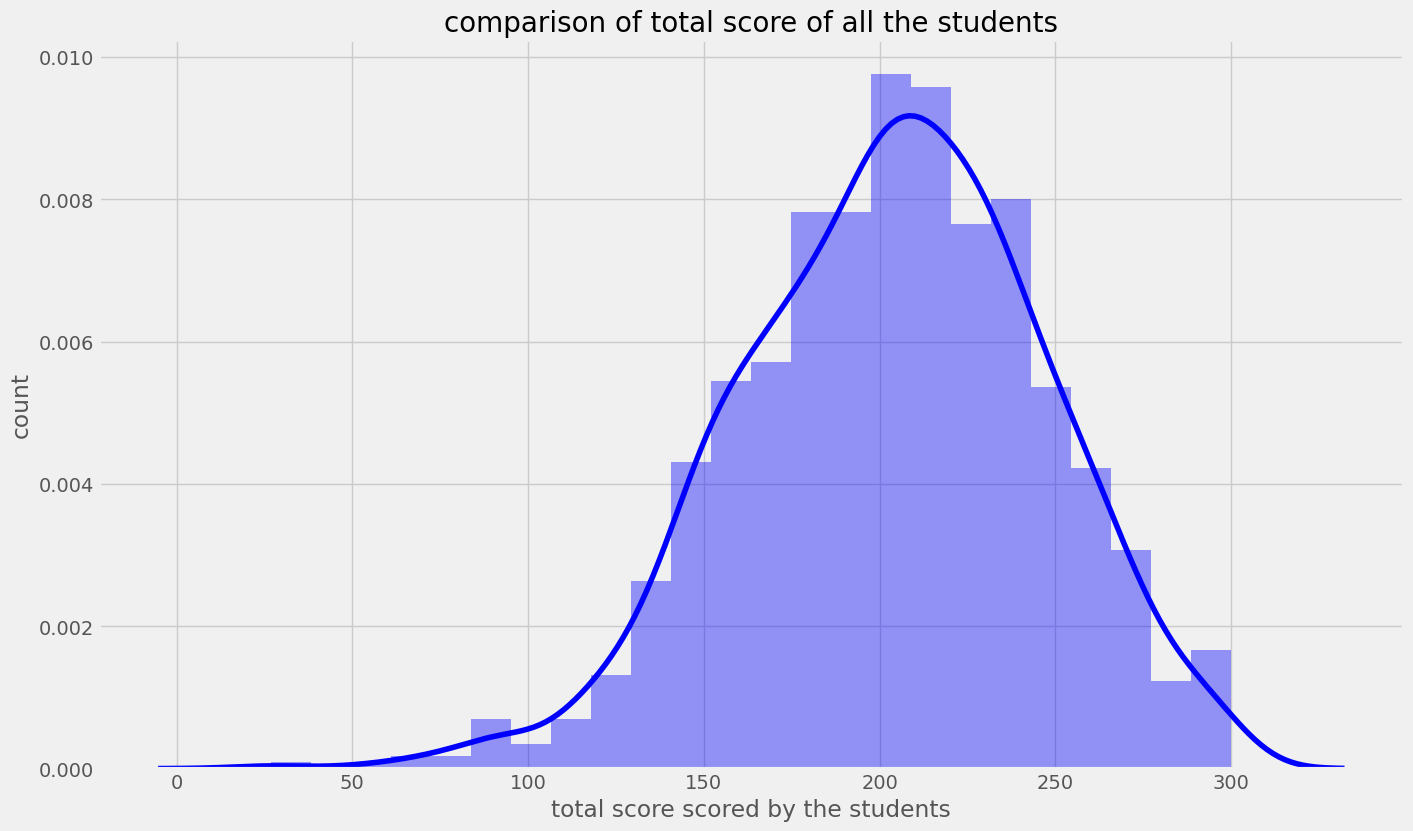

In [16]:
import warnings
warnings.filterwarnings('ignore')

df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

sns.distplot(df['total_score'], color = 'blue')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

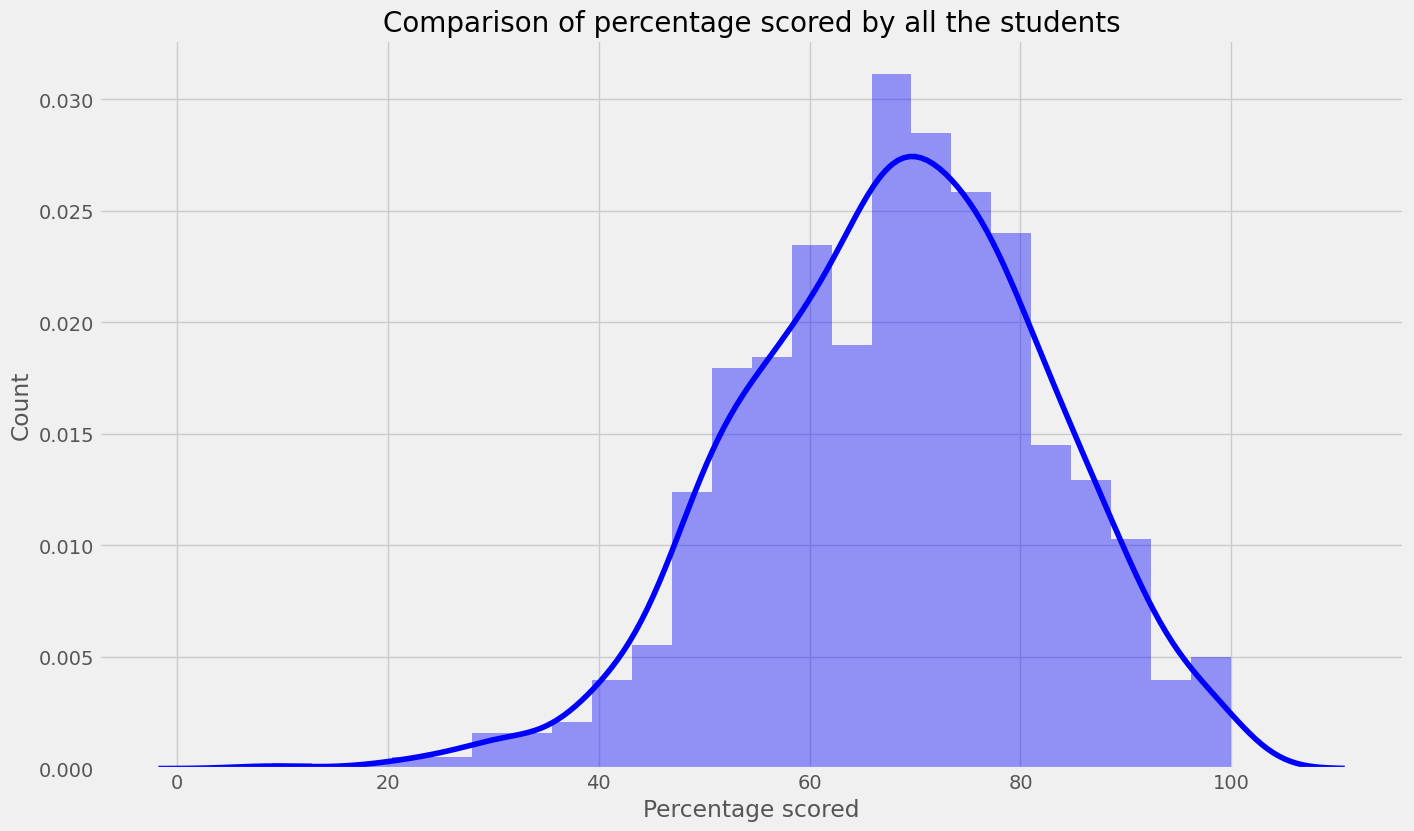

In [18]:
from math import * 
import warnings
warnings.filterwarnings('ignore')

df['percentage'] = df['total_score']/3

for i in range(0, 1000):
    df['percentage'][i] = ceil(df['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(df['percentage'], color = 'blue')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()